In [1]:
import sys, os
import yaml, json, io
import omnifig as fig

from datetime import datetime

import torch
from foundation import util

import numpy as np
from scipy.spatial.distance import pdist, squareform

torch.set_printoptions(linewidth=120)

fig.initialize('foundation', 'mnist')

In [2]:
name = 'test-pycharm_210101-205647'
# name = 'test-cmd_200816-180714'


run = fig.quick_run('load-run', path=name)
run

| [Pushed] run._type: 'run'
| CREATING run (type=run)
|  > silent: False (by default)
|  > invisible: False (by default)
|  > path: 'test-pycharm_210101-205647'
|  > [Pushed] novel: False
|  > override: {} (by default)
|  > saveroot --> root: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets' (by default)
Loading Config: C:\Users\anwan\Documents\workspace\trained_nets\test-pycharm_210101-205647\config.yaml
|  > ckpt-num: None (by default)
|  > best: False (by default)
|  > last: True (by default)
|  > [Pushed] dataset._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_210101-205647\\ckpt2000'
|  > [Pushed] model._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_210101-205647\\ckpt2000'
|  > [Pushed] records._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_210101-205647\\ckpt2000'
|  > CREATING clock (type=clock)
|  >  > CREATING .stats (type=stats-manager)
|  >  >  > stat-collection-fmts: {} (

RUN:test-pycharm_210101-205647

In [3]:
model = run.get_model()
model

| CREATING .model (type=model)
|  > _model_mod: [] (by default)
|  > .seed: 0
|  > CREATING . (type=simple)
|  >  > CREATING net (type=multilayer)
|  >  >  > final_din --> ..din [list with 3 item/s]
|  >  >  >  > (0): 1
|  >  >  >  > (1): 32
|  >  >  >  > (2): 32
|  >  >  > final_dout --> ..dout: 10
|  >  >  > in_order: True (by default)
|  >  >  > force_iter: True (by default)
|  >  >  > ITERATOR layers [list with 4 item/s]
|  >  >  > CREATING 0 (type=conv-layer)
|  >  >  >  > in_shape --> din: (1, 32, 32)
|  >  >  >  > ..channels: 32
|  >  >  >  > out_shape --> dout: None
|  >  >  >  > ..down: 2
|  >  >  >  > pool: None (by default)
|  >  >  >  > kernel_size --> kernel: (3, 3) (by default)
|  >  >  >  > padding: 1 (by default)
|  >  >  >  > dilation: (1, 1) (by default)
|  >  >  >  > stride: (2, 2) (by default)
|  >  >  >  > ...norm: None
|  >  >  >  > ..nonlin: 'elu'
|  >  >  >  > conv_kwargs: {} (by default)
|  >  >  >  > residual: False (by default)
|  >  >  >  > force_res: False 

Simple_Model(
  (net): MultiLayer(
    (layers): ModuleList(
      (0): ConvLayer(
        residual=False
        (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (1): ConvLayer(
        residual=False
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (2): ConvLayer(
        residual=False
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (3): ConvLayer(
        residual=False
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (4): MLP(
        (0): Flatten(start_dim=1, end_dim=-1)
        (1): Linear(in_features=128, out_features=64, bias=True)
        (2): ELU(alpha=1.0, inplace=True)
        (3): Linear(in_features=64, out_fea

In [4]:
dataset = run.get_dataset()
dataset.switch_to('val')

| CREATING ...dataset (type=dataset)
|  > [Pushed] dataroot: 'C:\\Users\\anwan\\Documents\\workspace\\local_data'
|  > .num_workers: 0
|  > batch_size: 128
|  > shuffle: True
|  > drop_last: False
|  > .step_device --> .device: 'cuda'
|  > infinite: False (by default)
|  > extractor: None (by default)
|  > allow_batched: True (by default)
|  > split [dict with 1 item/s]
|  >  > (val): 0.1666666
|  > shuffle-split: True (by default)
|  > split-src: 'train' (by default)
|  > _dataset_type --> ident --> name: 'mnist'
|  > _dataset_mod: [] (by default)
|  > default_mode --> mode: 'train' (by default)
|  > .seed: 0
|  > .din [list with 3 item/s]
|  >  > (0): 1
|  >  > (1): 32
|  >  > (2): 32
|  > .dout: 10
|  > mode: 'train'
|  > device: 'cpu'
|  > pin_memory: True (by default)
|  > epoch_seed --> .seed: 0
|  > skip_load: False (by default)
|  > CREATING . (type=dataset/mnist)
|  >  > dataroot: 'C:\\Users\\anwan\\Documents\\workspace\\local_data'
|  >  > download: False
|  >  > mode: 'train

C:\Users\anwan\anaconda3\lib\site-packages\torch\nn\functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [5]:
len(dataset)

10000

In [8]:
batch = dataset.get_batch(device='cuda', batch_size=16)
batch.device

'cuda'

In [9]:
x,y = batch
# x, y = dataset[:16]
x.shape,y.shape

(torch.Size([16, 1, 32, 32]), torch.Size([16]))

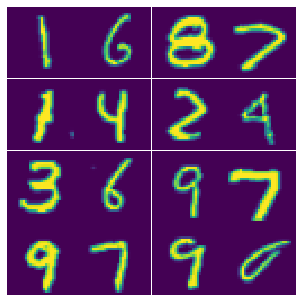

In [10]:
util.show_imgs(x)
pass

In [11]:
with torch.no_grad():
    pred = model(x)
pred

tensor([[ -1.5337,  14.5919,  -0.8643,  -2.2334,   2.3280,  -1.1418,  -0.8762,  -0.0673,   0.0700,  -0.0286],
        [  3.0704,   1.9342,  -7.3945,  -5.7670,   0.5566,   3.7781,  15.4643,  -6.8459,  -0.9463,  -6.0409],
        [ -1.1086,  -1.5420,  -0.0260,   1.9066,  -0.2900,   0.2199,  -1.5803,  -2.4479,  11.0436,   0.0834],
        [ -1.1137,  -1.6419,   2.7132,   1.0800,  -0.6695,  -2.6145,  -5.7460,   7.2278,  -1.5436,  -0.2688],
        [ -1.4902,  10.8545,  -0.7298,  -1.0958,   2.6491,  -1.0535,  -2.6165,   1.9898,  -0.0337,   1.2376],
        [ -7.9291,  -1.2377,  -2.2548,  -3.3297,  14.8150,  -2.7614,  -0.9944,  -1.8165,   1.2048,   0.4605],
        [ -0.8785,  -2.2396,  12.8958,   2.6297,  -0.3582,  -2.0306,  -4.1083,   4.1778,   1.0328,  -2.8605],
        [ -3.0447,  -3.1920,  -0.4444,  -2.5937,   7.0884,  -1.0311,  -0.6881,  -1.6629,  -1.8014,   1.6009],
        [-11.6971,  -1.1610,  -3.3830,  17.8660, -10.9078,   4.3356, -15.1093,   0.0547,  -5.8431,  -1.4804],
        [ 

In [13]:
pred.max(-1)[1]

tensor([1, 6, 8, 7, 1, 4, 2, 4, 3, 6, 9, 7, 9, 7, 9, 0], device='cuda:0')